In [1]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [8]:
# Load and prepare data
data = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Keep only two classes to simplify binary classification
data = data[data["Species"].isin(["Iris-setosa", "Iris-versicolor"])]
# Use SepalLength and SepalWidth as features
X = data[["SepalLengthCm", "SepalWidthCm"]].values
# Convert Species to binary values (0 and 1)
y = np.where(data["Species"] == "Iris-setosa", 0, 1)

In [10]:
# Simple Perceptron class
class Perceptron:
    def __init__(self, lr=0.1, epochs=100):
        self.lr = lr
        self.epochs = epochs

    def train(self, X, y):
        self.w = np.zeros(X.shape[1] + 1) # Weights initialized to zero
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                # Update rule for perceptron
                update = self.lr * (target - self.predict(xi))
                self.w[1:] += update * xi
                self.w[0] += update # Bias update

 # Returns 1 if weighted sum is >= 0, else 0
    def predict(self, x):
        return 1 if np.dot(x, self.w[1:]) + self.w[0] >= 0 else 0


In [11]:
# Plot function
def plot_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
     # Predict for each point in the grid
    
    Z = np.array([model.predict([x, y]) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
     # Plot contour and data points
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolor='k')
    plt.title(title)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.show()

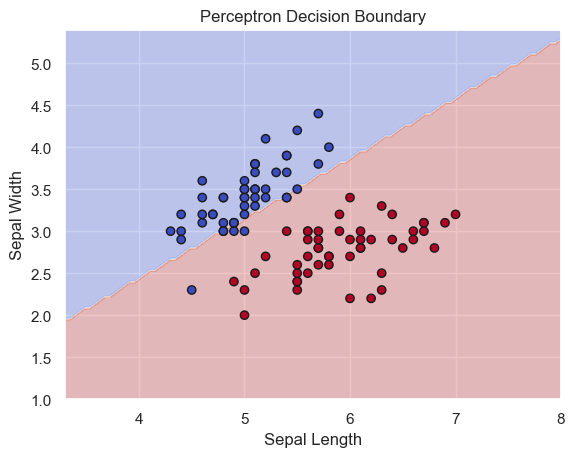

In [12]:
# Train and plot Perceptron
model = Perceptron()
model.train(X, y)
plot_boundary(model, X, y, "Perceptron Decision Boundary")


In [13]:
# Activation functions
def activation_func(x, name):
    if name == "tanh":
        return np.tanh(x), 1 - np.tanh(x)**2
    elif name == "sigmoid":
        sig = 1 / (1 + np.exp(-x))
        return sig, sig * (1 - sig)
    elif name == "leaky_relu":
        return np.where(x > 0, x, 0.01 * x), np.where(x > 0, 1, 0.01)

In [14]:
# Simple MLP class
class SimpleMLP:
    def __init__(self, act="tanh", lr=0.1, epochs=1000):
        self.act_name = act
        self.lr = lr
        self.epochs = epochs

    def train(self, X, y):
        np.random.seed(0)
        self.W1 = np.random.randn(X.shape[1], 4)
        self.b1 = np.zeros((1, 4))
        self.W2 = np.random.randn(4, 1)
        self.b2 = np.zeros((1, 1))
        y = y.reshape(-1, 1)
        for _ in range(self.epochs):
            z1 = X @ self.W1 + self.b1
            a1, da1 = activation_func(z1, self.act_name)
            z2 = a1 @ self.W2 + self.b2
            a2 = 1 / (1 + np.exp(-z2))
            loss = a2 - y
            dz2 = loss
            dW2 = a1.T @ dz2
            db2 = np.sum(dz2, axis=0)
            dz1 = (dz2 @ self.W2.T) * da1
            dW1 = X.T @ dz1
            db1 = np.sum(dz1, axis=0)

            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1

    def predict(self, X):
        z1 = X @ self.W1 + self.b1
        a1, _ = activation_func(z1, self.act_name)
        z2 = a1 @ self.W2 + self.b2
        a2 = 1 / (1 + np.exp(-z2))
        return (a2 > 0.5).astype(int).flatten()


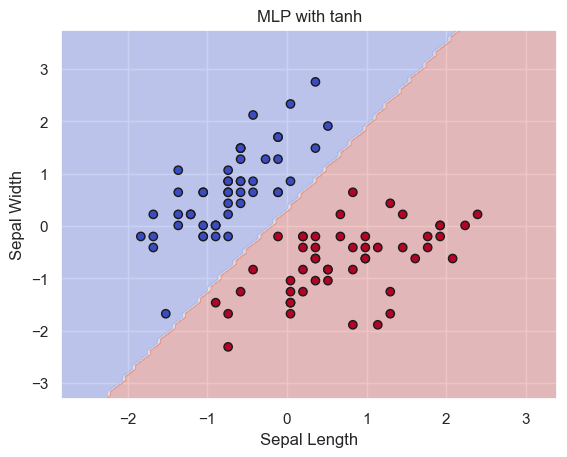

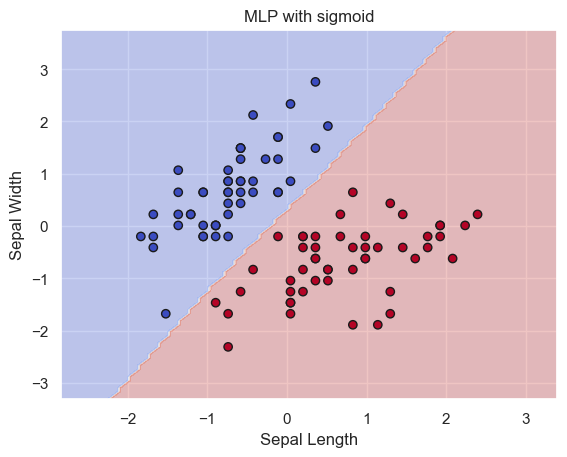

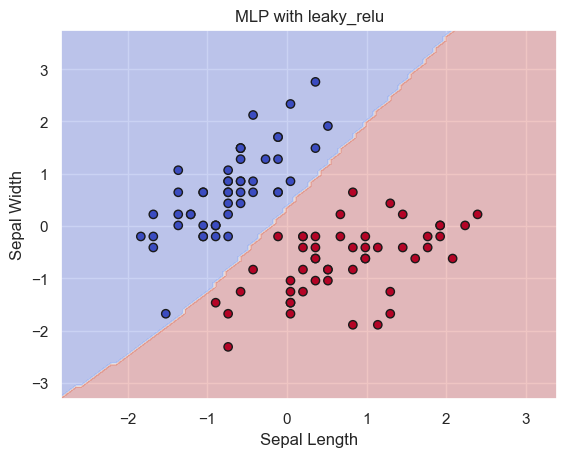

In [15]:
# Normalize and train MLP
X = StandardScaler().fit_transform(X)
for act in ["tanh", "sigmoid", "leaky_relu"]:
    mlp = SimpleMLP(act=act)
    mlp.train(X, y)
    plot_boundary(mlp, X, y, f"MLP with {act}")